In [25]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [26]:
def tratamentoDeArquivos(arquivo):
    dados = str()
    for linha in arquivo:
        dados = linha
        break # estamos interessados na primeira linha do arquivo
    
    # transformação de string para lista
    stringSize = len(dados)
    dados = dados[1:stringSize-2]
    dados = dados.split(', ')
    
    # complementar o dataframe com valores vazios
    sizeDados = len(dados)
    difVazios = 100 - sizeDados 
    complementoDados = difVazios*[np.nan] 
    dados += complementoDados
    
    # converte os dados de string para tipo de dados numerico
    for j in range(sizeDados):
        dados[j] = int(dados[j])
        
    return dados

In [27]:
# Esse código recebe os dados em formato txt 
# salvos no repositório do projeto, e transforma em um DataFrame  

experimento = {}

# gerando lista de medidas:
listaDeMedidas = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]; # Posições relacionadas ao 

#add dist. de referencia. 
nomeDoArquivo = "../dados/experimento8Ob/0.5 m.txt" 
arquivo = open(nomeDoArquivo, 'r')
dados = tratamentoDeArquivos(arquivo)
coluna = '0.5 m'
experimento[coluna] = dados

sizeMedidas = len(listaDeMedidas)
for i in range(sizeMedidas):
    medida = listaDeMedidas[i]
    nomeDoArquivo = "../dados/experimento8Ob/"+ str(medida)+" m.txt" 
    arquivo = open(nomeDoArquivo, 'r')
    
    # add data
    dados = tratamentoDeArquivos(arquivo)
    coluna = str(medida) + " m"
    experimento[coluna] = dados

# Gerando um DataFrame
experimento = pd.DataFrame(data=experimento)
experimento

,0.5 m,1.0 m,2.0 m,3.0 m,4.0 m,5.0 m,6.0 m,7.0 m,8.0 m,9.0 m,10.0 m
0,-51,-53,-62,-71,-80,-80,-84,-77,-83,-86,-84
1,-55,-59,-66,-75,-78,-81,-84,-87,-85,-84,-84
2,-57,-53,-71,-87,-80,-78,-77,-81,-83,-84,-84
3,-51,-59,-66,-76,-72,-78,-83,-86,-83,-88,-88
4,-59,-53,-66,-69,-83,-80,-76,-87,-89,-84,-86
5,-56,-53,-66,-66,-76,-78,-86,-87,-88,-83,-84
6,-59,-53,-69,-74,-78,-84,-76,-87,-83,-81,-81
7,-51,-58,-68,-82,-77,-76,-89,-86,-86,-86,-81
8,-59,-59,-69,-82,-80,-78,-76,-85,-88,-81,-84
9,-59,-53,-66,-76,-79,-78,-77,-81,-83,-83,-84


In [28]:
descricaoDosDados = experimento.describe()

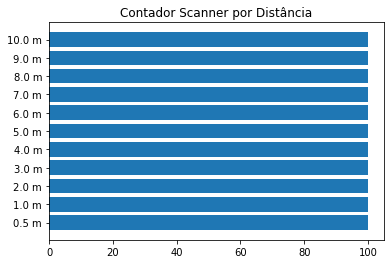

In [29]:
# grafico de barras p/ count


bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][0])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Contador Scanner por Distância')
plt.savefig('graficocountdescribe.png')
plt.show()




In [30]:
descricaoDosDados = experimento.describe()
descricaoDosDados

,0.5 m,1.0 m,2.0 m,3.0 m,4.0 m,5.0 m,6.0 m,7.0 m,8.0 m,9.0 m,10.0 m
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-55.570000,-55.730000,-66.72000,-77.150000,-79.210000,-79.43000,-79.660000,-84.440000,-85.360000,-82.920000,-84.060000
std,3.435569,2.577506,2.88878,3.118453,2.527805,2.11419,3.827651,2.275562,2.679967,2.740198,1.868506
min,-60.000000,-60.000000,-83.00000,-87.000000,-87.000000,-86.00000,-89.000000,-87.000000,-90.000000,-91.000000,-89.000000
25%,-59.000000,-59.000000,-68.00000,-79.000000,-81.000000,-80.25000,-82.000000,-86.000000,-88.000000,-85.000000,-85.000000
50%,-57.000000,-54.000000,-67.00000,-78.000000,-79.000000,-79.00000,-77.000000,-85.000000,-84.000000,-82.000000,-84.000000
75%,-51.000000,-54.000000,-65.00000,-75.000000,-77.000000,-78.00000,-76.000000,-82.750000,-83.000000,-81.000000,-83.000000
max,-50.000000,-53.000000,-61.00000,-66.000000,-72.000000,-75.00000,-74.000000,-77.000000,-78.000000,-78.000000,-80.000000


In [31]:
resultados = {'d0(m)': [], 'd(m)': [], 'β0(dB)': [],  'RSSI(dBm)' : [], "PTx(dBm)": [], 'PL(dB)': [], 'x': [], 'y': [] }

#resultados['η'] = []



d0 = 1.0 # valor fixo
d = 0.5 # distancia de medição, inicia em 0.5; 
tx = -59
f = (2.426) * math.pow(10,9)  # frenquencia do meio, Beacon BLE
c = 3 * math.pow(10,8)  
λ = c/f                 # comprimento de onda

#β0 = (4 * math.pi * d0)/ λ
#β0 = math.pow(β0,2)        # eleva ao quadrado
#β0 = 10 * math.log10(β0)      # mudando a unidade de betaZero para dB
β0 = tx - descricaoDosDados['0.5 m'][5] # pega o RSSI mediano 

for i in descricaoDosDados:
    
    RSSI = descricaoDosDados[i][5]
    pL = tx - RSSI
    
    #n = (pL - β0)/10*math.log10(d/d0)
    
    y = (pL - β0)/10
    x = math.log10(d/d0)
    
    resultados['d0(m)'].append(d0)
    resultados['d(m)'].append(d)
    resultados['RSSI(dBm)'].append(RSSI)
    resultados['PTx(dBm)'].append(tx)
    resultados['PL(dB)'].append(pL)
    #resultados['η'].append(n)
    resultados['β0(dB)'].append(β0)
    resultados['x'].append(x)
    resultados['y'].append(y)
    
    d += 1 if (d != 0.5) else 0.5


resultadosDataFrame = pd.DataFrame(resultados)
resultadosDataFrame

,d0(m),d(m),β0(dB),RSSI(dBm),PTx(dBm),PL(dB),x,y
0,1.0,0.5,-2.0,-57.0,-59,-2.0,-0.301030,0.0
1,1.0,1.0,-2.0,-54.0,-59,-5.0,0.000000,-0.3
2,1.0,2.0,-2.0,-67.0,-59,8.0,0.301030,1.0
3,1.0,3.0,-2.0,-78.0,-59,19.0,0.477121,2.1
4,1.0,4.0,-2.0,-79.0,-59,20.0,0.602060,2.2
5,1.0,5.0,-2.0,-79.0,-59,20.0,0.698970,2.2
6,1.0,6.0,-2.0,-77.0,-59,18.0,0.778151,2.0
7,1.0,7.0,-2.0,-85.0,-59,26.0,0.845098,2.8
8,1.0,8.0,-2.0,-84.0,-59,25.0,0.903090,2.7
9,1.0,9.0,-2.0,-82.0,-59,23.0,0.954243,2.5


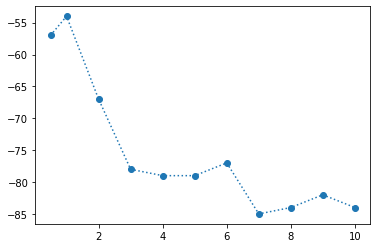

In [32]:
plt.plot(resultados['d(m)'], resultados['RSSI(dBm)'], marker='o', linestyle = ':' )

# RSSI em Função da Distância

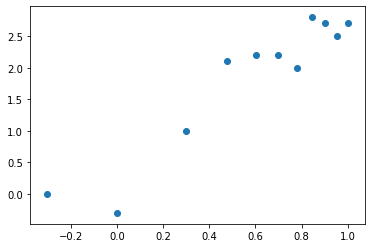

In [33]:
plt.scatter(resultados['x'], resultados['y'])

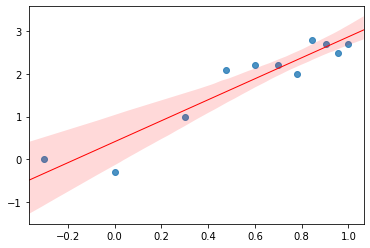

In [34]:
sns.regplot(x=resultados['x'], y=resultados['y'], line_kws={"color":"r","lw":1} )

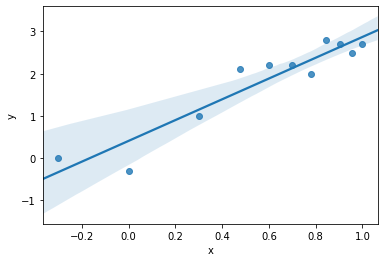

In [35]:
sns.regplot(x=resultadosDataFrame['x'], y=resultadosDataFrame["y"])

In [36]:
arquivo = open('x.txt', 'w')
for i in resultados['x']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [37]:
arquivo = open('y.txt', 'w')
for i in resultados['y']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [38]:
X = resultados['x']
y = resultados['y']

In [39]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     72.74
Date:                Fri, 21 Feb 2020   Prob (F-statistic):           1.32e-05
Time:                        16:44:00   Log-Likelihood:                -3.8828
No. Observations:                  11   AIC:                             11.77
Df Residuals:                       9   BIC:                             12.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4103      0.200      2.050      0.071      -0.043       0.863
x1             2.4584      0.288      8.529      0.000       1.806       3.110
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.462
Skew:                          -0.407   Prob(JB):                        0.794
Kurtosis:                       2.410   Cond. No.                         3.43
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([-0.32971205,  0.41033347,  1.150379  ,  1.58327788,  1.89042453,
        2.12866598,  2.32332341,  2.48790393,  2.63047006,  2.75622229,
        2.8687115 ])

In [41]:
arquivo = open('pL.txt', 'w')
for i in resultados['PL(dB)']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [42]:
arquivo = open('d.txt', 'w')
for i in resultados['d(m)']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [43]:
η = 1.1313 # eta calculado no octave
pL = []

for d in resultados['d(m)']:
    pl = 1 + 10*η*math.log10(d)
    pL.append(pl)
    
dadosPL = {"PL":pL}
dadosPL['d'] = resultados['d(m)']
dataFramePL = pd.DataFrame(dadosPL)
dataFramePL

,PL,d
0,-2.405552,0.5
1,1.000000,1.0
2,4.405552,2.0
3,6.397673,3.0
4,7.811105,4.0
5,8.907448,5.0
6,9.803225,6.0
7,10.560594,7.0
8,11.216657,8.0
9,11.795346,9.0


In [44]:
arquivo = open('pL.txt', 'w')
for p in pL:
    arquivo.write(str(p)+"\n")
arquivo.close()

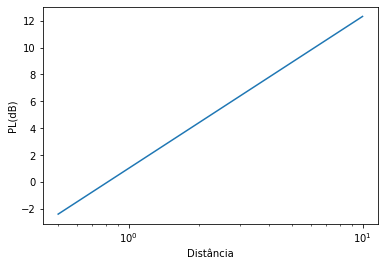

In [45]:
plt.semilogx(dataFramePL['d'],dataFramePL['PL'], basex = 10)
plt.ylabel('PL(dB)')
plt.xlabel('Distância')
plt.savefig('pL(db)Dist.png')

In [46]:
import seaborn as sns; 
tips = {'Distancia': resultados['x'], 'PL(d)':resultados['y']}
tips = pd.DataFrame(tips)

In [47]:
tips

,Distancia,PL(d)
0,-0.301030,0.0
1,0.000000,-0.3
2,0.301030,1.0
3,0.477121,2.1
4,0.602060,2.2
5,0.698970,2.2
6,0.778151,2.0
7,0.845098,2.8
8,0.903090,2.7
9,0.954243,2.5


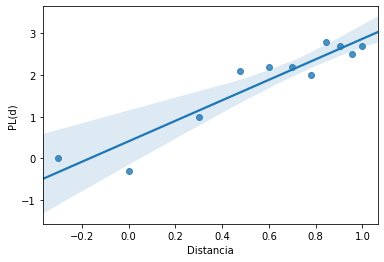

In [48]:
ax = sns.regplot(x="Distancia", y="PL(d)", data=tips)
plt.savefig('reg.png')